In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('email_classification.csv')
df.head()

,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham
3,Your Amazon account has been locked. Click her...,spam
4,Your opinion matters! Take our survey and help...,ham


1.Data Cleaning


In [3]:
df.isnull().sum()

email    0
label    0
dtype: int64

In [4]:
df.shape

(179, 2)

In [5]:
df.dtypes

email    object
label    object
dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['label']=encoder.fit_transform(df['label'])

In [7]:
df.head()

,email,label
0,Upgrade to our premium plan for exclusive acce...,0
1,Happy holidays from our team! Wishing you joy ...,0
2,We're hiring! Check out our career opportuniti...,0
3,Your Amazon account has been locked. Click her...,1
4,Your opinion matters! Take our survey and help...,0


In [8]:
df.duplicated().sum()

29

In [9]:
df=df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(150, 2)

2.EDA

In [12]:
df['label'].value_counts()

label
0    100
1     50
Name: count, dtype: int64

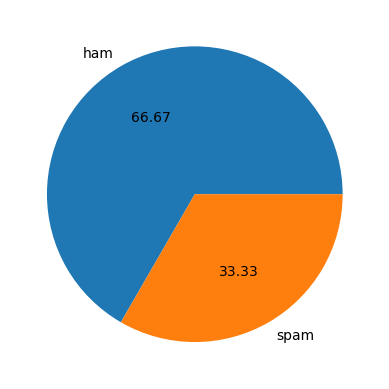

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),autopct='%0.2f',labels=['ham','spam'])
plt.show()

Data is slightly imbalance

In [14]:
import nltk

In [15]:
df['num_characters']=df['email'].apply(len)

In [16]:
df

,email,label,num_characters
0,Upgrade to our premium plan for exclusive acce...,0,81
1,Happy holidays from our team! Wishing you joy ...,0,73
2,We're hiring! Check out our career opportuniti...,0,75
3,Your Amazon account has been locked. Click her...,1,83
4,Your opinion matters! Take our survey and help...,0,74
...,...,...,...
174,We're pleased to inform you that your refund h...,0,77
175,Get rich quick! Invest in our revolutionary ne...,1,72
176,Your free trial period is ending soon. Upgrade...,0,85
177,Your order is on its way! Track your shipment ...,0,68


In [17]:
df['num_words']=df['email'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
df.head()

,email,label,num_characters,num_words
0,Upgrade to our premium plan for exclusive acce...,0,81,14
1,Happy holidays from our team! Wishing you joy ...,0,73,14
2,We're hiring! Check out our career opportuniti...,0,75,15
3,Your Amazon account has been locked. Click her...,1,83,15
4,Your opinion matters! Take our survey and help...,0,74,14


In [19]:
df['num_sentences']=df['email'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,email,label,num_characters,num_words,num_sentences
0,Upgrade to our premium plan for exclusive acce...,0,81,14,1
1,Happy holidays from our team! Wishing you joy ...,0,73,14,2
2,We're hiring! Check out our career opportuniti...,0,75,15,2
3,Your Amazon account has been locked. Click her...,1,83,15,2
4,Your opinion matters! Take our survey and help...,0,74,14,2


In [21]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,150.000000,150.000000,150.000000
mean,77.393333,15.553333,2.053333
std,10.537817,2.141118,0.380509
min,52.000000,11.000000,1.000000
25%,69.250000,14.000000,2.000000
50%,78.000000,15.000000,2.000000
75%,85.000000,17.000000,2.000000
max,107.000000,22.000000,3.000000


In [22]:
df.columns

Index(['email', 'label', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [23]:
#ham
df[df['label']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,100.000000,100.000000,100.000000
mean,78.680000,15.740000,1.980000
std,9.073082,2.130206,0.317185
min,52.000000,11.000000,1.000000
25%,73.000000,14.000000,2.000000
50%,79.000000,15.000000,2.000000
75%,85.000000,17.000000,2.000000
max,98.000000,22.000000,3.000000


In [24]:
#spam
df[df['label']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,50.000000,50.000000,50.000000
mean,74.820000,15.180000,2.200000
std,12.696922,2.135129,0.451754
min,56.000000,12.000000,1.000000
25%,64.500000,14.000000,2.000000
50%,73.000000,15.000000,2.000000
75%,83.750000,16.000000,2.000000
max,107.000000,21.000000,3.000000


In [25]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

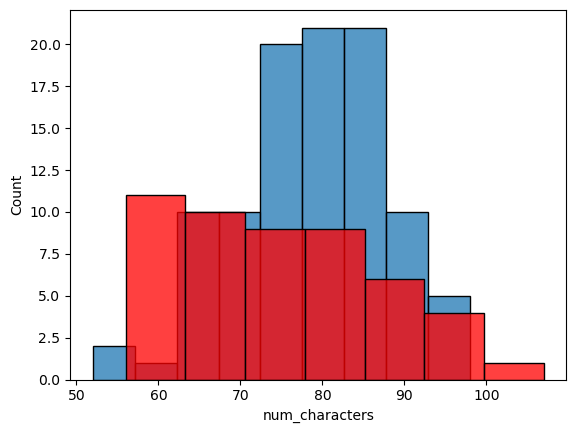

In [26]:
sns.histplot(df[df['label']==0]['num_characters'])
sns.histplot(df[df['label']==1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

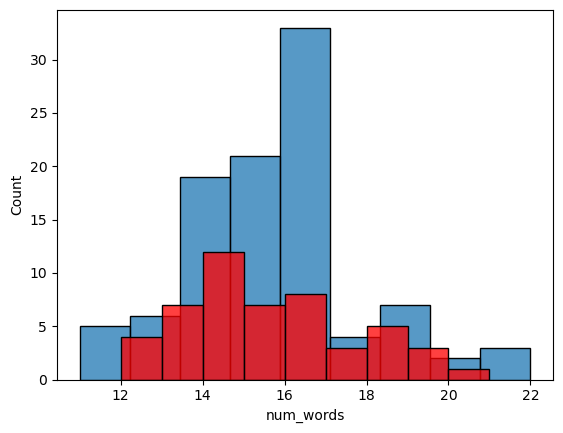

In [27]:
sns.histplot(df[df['label']==0]['num_words'])
sns.histplot(df[df['label']==1]['num_words'],color='red')


<Axes: >

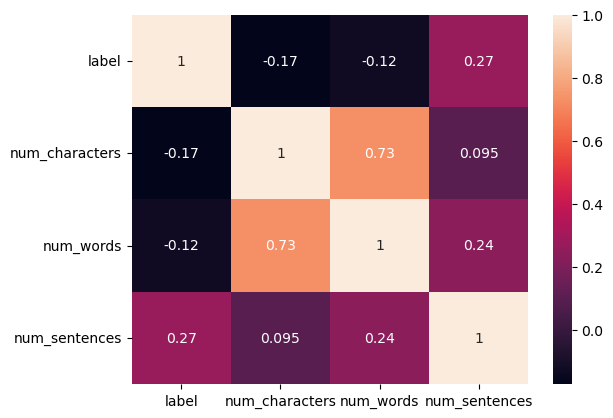

In [28]:
corelation=df[['label','num_characters', 'num_words', 'num_sentences']].corr()
sns.heatmap(corelation,annot=True)

3.Data PreProcessing

In [29]:
import string
from nltk.corpus import stopwords

In [30]:
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

In [31]:
def transform_text(text):
    #lowercase
    text=text.lower()
    #tokenization
    text=nltk.word_tokenize(text)
    #remove special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    #remove stopwords
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(lemma.lemmatize(i,pos='v'))
    return " ".join(y)

In [32]:
transform_text("I can't wait for the new season of my favorite show!")

'ca wait new season favorite show'

In [33]:
df['transformed_text']=df['email'].apply(transform_text)

In [34]:
df.head()

,email,label,num_characters,num_words,num_sentences,transformed_text
0,Upgrade to our premium plan for exclusive acce...,0,81,14,1,upgrade premium plan exclusive access premium ...
1,Happy holidays from our team! Wishing you joy ...,0,73,14,2,happy holiday team wish joy prosperity season
2,We're hiring! Check out our career opportuniti...,0,75,15,2,hire check career opportunities join dynamic team
3,Your Amazon account has been locked. Click her...,1,83,15,2,amazon account lock click verify account infor...
4,Your opinion matters! Take our survey and help...,0,74,14,2,opinion matter take survey help us enhance exp...


In [35]:
from wordcloud import WordCloud
wc=WordCloud()

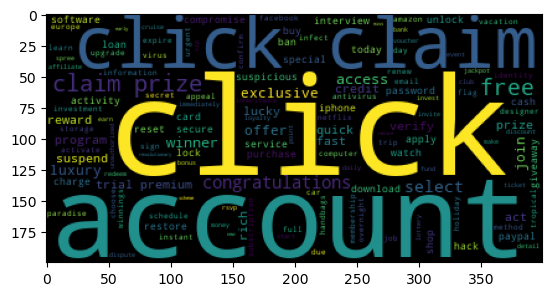

In [36]:
spam_wc=wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

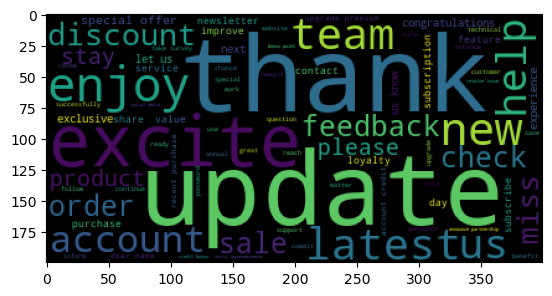

In [37]:
ham_wc=wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

4.Model Building

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [40]:
x=tfidf.fit_transform(df['transformed_text']).toarray()
x

array([[0.        , 0.29524189, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.53035361, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [41]:
x.shape

(150, 388)

In [42]:
y=df['label'].values
y

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=32)

In [45]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import confusion_matrix,classification_report

In [46]:
mnb=MultinomialNB()
gnb=GaussianNB()

In [47]:
mnb.fit(xtrain,ytrain)
ypred=mnb.predict(xtest)
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

[[20  0]
 [ 1  9]]
